##Introduction to tensors



In [ ]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
#create tensor with tf.constant()
scalar=tf.constant(7)
scalar


<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
#check number of dimensions for tensor(ndim-> number of dimensions)
scalar.ndim

0

In [ ]:
#create a vector
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim


1

In [ ]:
matrix=tf.constant([[10,7],[7,10]])
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

matrix.ndim

In [ ]:
tensor=tf.constant([[[1,3,5],
 [3,6,7]],
  [[4,6,2],[3,3,3]],
                    [[1,5,3],[5,7,2]]])
tensor


<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[1, 3, 5],
        [3, 6, 7]],

       [[4, 6, 2],
        [3, 3, 3]],

       [[1, 5, 3],
        [5, 7, 2]]], dtype=int32)>

In [ ]:
tensor.ndim

3

In [ ]:
a_matrix=tf.constant([[10.,6.,2.],
                     [3.,4.,3.],
                     [2.,1.,2.]],dtype=tf.float16)
a_matrix



<tf.Tensor: shape=(3, 3), dtype=float16, numpy=
array([[10.,  6.,  2.],
       [ 3.,  4.,  3.],
       [ 2.,  1.,  2.]], dtype=float16)>

what we have learned so far
*Scalar= a single number
*Vector= a number with direction
*Matrix = a two dimensional array of number
*Tensor=a n dimensional array of number


Creating Tensors with tf.Variable


In [ ]:
tf.Variable


tensorflow.python.ops.variables.Variable

In [ ]:
changeable_tensor=tf.Variable([10,7])
unchangeable_tensor=tf.constant([10,7])
changeable_tensor,unchangeable_tensor


(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
changeable_tensor[0].assign(1)


<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([1, 7], dtype=int32)>

In [ ]:
unchangeable_tensor[0].assign(1)

AttributeError: ignored

Creating Random Tensors


In [ ]:
#creating 2 random
random1=tf.random.Generator.from_seed(43) #set seed for reproducibility
random1=random1.normal(shape=(3,2))
random2=tf.random.Generator.from_seed(43)
random2=random2.normal(shape=(3,2))
random1,random2,random1==random2


**Shuffle The order of elements in the tensor**

In [ ]:
not_shuffled=tf.constant([[5,2]
                          ,[2,7],
                          [3,5]])
tf.random.shuffle(not_shuffled)


In [ ]:
#set seed so it will not shuffle
tf.random.set_seed(42)  # global level random seed
tf.random.shuffle(not_shuffled,seed=42) #operation level random seed

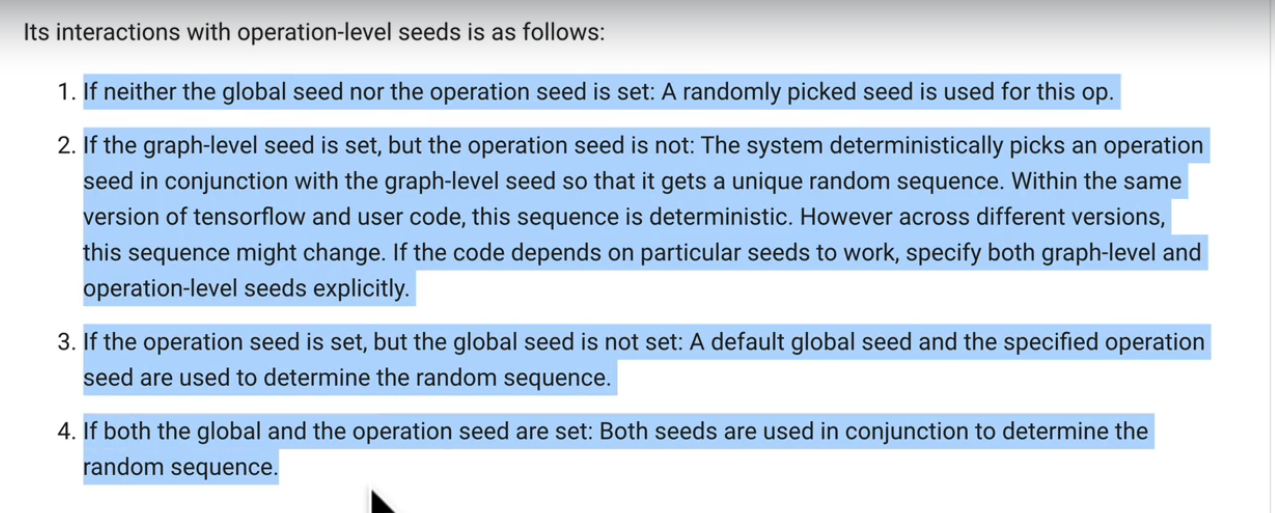

**Other Ways to create Tensors**

In [ ]:
#tensor to create all 1s
tf.ones([3,4],tf.int32)


In [ ]:
#Tensors to create all 0s
tf.zeros(shape=(3,4))

### Turn Numpy Arrays into Tensors
The main difference between numpy arrays and tensorflow tensors is that tensors could run on gpu (much faster for numerical computing)

In [ ]:
import numpy as np
numpy_A=np.arange(1,25,dtype=np.int32)
numpy_A


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A=tf.constant(numpy_A)
B=tf.constant(numpy_A,shape={2,3,4}) # 2*3*4=24
A,B


(<tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>)

## Tensors Atrributes



*   Shape: The length of each of the dimension of tensor (tensor.shape)
*   Rank:No of tensor dimension. (tensor.ndim)
*   Axis or dimension:a particular dimension of tensor (tensor[0]
*   Size: Total no of items in a tensor (tf.size(tensor))






In [ ]:
#Create  a rank 4 tensor
tensor4rank=tf.zeros(shape=[2,3,4,5])
tensor4rank

In [ ]:
tensor4rank[0]



In [ ]:
tensor4rank.shape,tensor4rank.ndim,tf.size(tensor4rank)

In [ ]:
#Attributes of tensor
print("Datatype of every element: ",tensor4rank.dtype)
print("No of dimensions(rank) : ",tensor4rank.ndim)
print("Shape of a tensor: ",tensor4rank.shape)
print("Elements along 0th axis: ",tensor4rank.shape[0])
print("Elements along the last axis: ",tensor4rank.shape[-1])
print("Total number of elements in our tensor: ", tf.size(tensor4rank).numpy())


###Indexing Tensors
Tensors can be indexed with **Python lists**

In [ ]:
some_list =[1,2,3,4]
some_list[:2]

In [ ]:
#Get first 2 elements of each dimension
tensor4rank[:2,:2,:2,:2]


In [ ]:
#Create a rank of 2 dimension
tensor_2_rank=tf.constant([[10,7]
                          ,[7,20]])
tensor_2_rank.shape,tensor_2_rank.ndim

In [ ]:
#Get the last item of each row
tensor_2_rank[:,-1]

In [ ]:
#Add in extra dimension for the rank 2 matrix
tensor_3_rank=tensor_2_rank[...,tf.newaxis]
tensor_3_rank


In [ ]:
#Alternative to tf.newaxis
tf.expand_dims(tensor_2_rank,axis=0) #expand the 0-axis


###Manipulating Tensors (tensors operations)
**Basic Operations**
+,-,*,/

In [ ]:
# Addition Operator
tensor=tf.constant([[10,7],[3,4]])
tensor+10

In [ ]:
tensor*10

In [ ]:
tensor-10

In [ ]:
#tensorflow built in function
tf.multiply(tensor,10)

In [ ]:
#original tensor unchanged
tensor


### Matrix Multiplication


In [ ]:
print(tensor)

In [ ]:
#matrix multiplication
tf.matmul(tensor,tensor)

In [ ]:
tensor*tensor  #elements wise

In [ ]:
#Using Python Operator '@' used dor same shape only
tensor@ tensor



In [ ]:
# Create a tensor for 3*2
X=tf.constant([[1,2],
               [3,4],
               [5,6]])

## another 3*2 tensor
Y=tf.constant([[7,8],
               [9,10],
               [11,12]])
X,Y

In [ ]:
X @ Y

In [ ]:
tf.matmul(X,Y) #dimension taken as wrong

We cant multipky (3,2) * (3,2)
we can (2,3)*(3,2) =(2,2)

In [ ]:
## reshape the matrix (3,2)->(2,3)
tf.reshape(Y,shape=(2,3))

In [ ]:
X.shape, tf.reshape(Y,shape=(2,3)).shape

In [ ]:
X @ tf.reshape(Y,shape=(2,3))

In [ ]:
X, tf.transpose(X),tf.reshape(X,shape=(2,3))

### DOT PRODUCT

Matrix Multiplication can also be done by dot product
 Matrix Multiplication using


*   tf.matmul
*   tf.tensordot




In [ ]:
X,Y


In [ ]:
tf.tensordot(tf.transpose(X),Y,axes=1)


### Changing the datatype of Tensor

In [ ]:
B=tf.constant([10,7])
B.dtype

In [ ]:
#Chnaging from float32 to float16
D=tf.cast(B,dtype=tf.float16)
D,D.dtype

###Aggregating Tensors

In [ ]:
D=tf.constant([-7,-10])


In [ ]:
## Get absolute Value
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([10.,  7.], dtype=float16)>

# Forms of agrression


*   Mnimumum
*   maximum


*   mean of tensor
*   sum of tensor






In [ ]:
#Create a random tensors between 0 and 100
E=tf.constant(np.random.randint(0,100,size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([78, 26, 33, 73, 54, 18, 42, 47, 48, 49, 48, 22, 12, 75, 67, 74, 95,
       74, 30, 29, 61, 56,  3, 96, 59, 45, 63, 63,  7,  9, 81, 21, 95,  1,
       34, 46, 90, 20, 36, 80, 53, 19,  4, 48, 84, 11, 90, 12, 66, 52])>

In [ ]:
tf.size(E),E.shape,E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
#Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
#numpy
np.min(E)

1

In [ ]:
#Max
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=96>

In [ ]:
#standard deviation and variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=758>

In [ ]:
tf.math.reduce_std(tf.cast(E,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=27.524164>

In [ ]:
#variance
tf.math.reduce_variance(tf.cast(E,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=757.5796>

###Positional Maximum
tf.argmax

In [ ]:
tf.random.set_seed(42)
F=tf.random.uniform(shape=[50])

In [ ]:
#Find positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
#Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [ ]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

###Squeezing a Tensor

In [ ]:
tf.random.set_seed(42)
G= tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=int64, numpy=
array([[[[[23, 78, 51, 40, 95, 81, 78,  2, 40, 90, 52, 55, 66, 71, 72,
           69, 31, 61, 31, 91, 61, 40, 62, 18, 86, 80, 62, 18, 10, 94,
           68,  1, 68, 40, 14, 44, 57, 80,  6, 55, 73, 74, 92, 69, 87,
            0, 20, 62, 49, 59]]]]])>

### One Hot Encoding Tensor

In [ ]:
list= [0,1,1,3]
tf.one_hot(list,depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)>